In [225]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
from datetime import datetime
from pandas import Timestamp

In [226]:
data_filename = '/Users/brucelowther/src/python/telset/data/20220904142222_trace.data'

In [227]:
index_columns = ['trace-project_id', 'trace-trace_id']
dtypes = {'trace-project_id':str, 'trace-trace_id':str, 'span-index':int,
          'span-name':str,
          'span-kind':str,
          'span-start_time':object,'span-end_time':object}
time_columns = ['span-start_time', 'span-end_time']

df = pd.read_csv(data_filename,
                 dtype=dtypes,
                 parse_dates=time_columns,
                 infer_datetime_format=True,
                 date_parser=pd.to_datetime,
                 index_col=index_columns)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 24 entries, ('gcptraining-221417', '4933bc4bb8ff4e0edbd90c05d96230d6') to ('gcptraining-221417', 'f908e23ef26e5fa57626c13931adaefe')
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   span-index       24 non-null     int64              
 1   span-name        24 non-null     object             
 2   span-kind        24 non-null     object             
 3   span-start_time  24 non-null     datetime64[ns, UTC]
 4   span-end_time    24 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), int64(1), object(2)
memory usage: 1.4+ KB


In [229]:
df_latency = df[(df['span-kind']=='RPC_CLIENT') | (df['span-kind'] == 'RPC_SERVER')]

In [230]:
df_latency

span-index  \
trace-project_id   trace-trace_id                                 
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6           0   
                   4933bc4bb8ff4e0edbd90c05d96230d6           1   
                   79d08c912071e770d97dfe68515ea98e           1   
                   b9784102c316efc2d328878793becb5f           0   
                   b9784102c316efc2d328878793becb5f           1   
                   c5672efb1b177d558f6bfb44e53ef660           1   
                   f81a577ef85ae24cbf2527b5c5e63e35           0   
                   f81a577ef85ae24cbf2527b5c5e63e35           1   
                   f908e23ef26e5fa57626c13931adaefe           1   

                                                                 span-name  \
trace-project_id   trace-trace_id                                            
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6  client-bruces-mbp.lan   
                   4933bc4bb8ff4e0edbd90c05d96230d6                /foobar   
                   79d08c912071e770d97dfe68515ea98e                /foobar   
                   b9784102c316efc2d328878793becb5f  client-bruces-mbp.lan   
                   b9784102c316efc2d328878793becb5f                /foobar   
                   c5672efb1b177d558f6bfb44e53ef660                /foobar   
                   f81a577ef85ae24cbf2527b5c5e63e35  client-bruces-mbp.lan   
                   f81a577ef85ae24cbf2527b5c5e63e35                /foobar   
                   f908e23ef26e5fa57626c13931adaefe                /foobar   

                                                      span-kind  \
trace-project_id   trace-trace_id                                 
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6  RPC_CLIENT   
                   4933bc4bb8ff4e0edbd90c05d96230d6  RPC_SERVER   
                   79d08c912071e770d97dfe68515ea98e  RPC_SERVER   
                   b9784102c316efc2d328878793becb5f  RPC_CLIENT   
                   b9784102c316efc2d328878793becb5f  RPC_SERVER   
                   c5672efb1b177d558f6bfb44e53ef660  RPC_SERVER   
                   f81a577ef85ae24cbf2527b5c5e63e35  RPC_CLIENT   
                   f81a577ef85ae24cbf2527b5c5e63e35  RPC_SERVER   
                   f908e23ef26e5fa57626c13931adaefe  RPC_SERVER   

                                                                        span-start_time  \
trace-project_id   trace-trace_id                                                         
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6    2022-09-04 14:27:16.263126+00:00   
                   4933bc4bb8ff4e0edbd90c05d96230d6    2022-09-04 14:27:16.267279+00:00   
                   79d08c912071e770d97dfe68515ea98e 2022-09-03 15:08:59.131353734+00:00   
                   b9784102c316efc2d328878793becb5f    2022-09-04 14:27:08.360621+00:00   
                   b9784102c316efc2d328878793becb5f    2022-09-04 14:27:08.365022+00:00   
                   c5672efb1b177d558f6bfb44e53ef660 2022-09-03 15:13:01.663856899+00:00   
                   f81a577ef85ae24cbf2527b5c5e63e35    2022-09-04 14:27:03.940131+00:00   
                   f81a577ef85ae24cbf2527b5c5e63e35    2022-09-04 14:27:04.518338+00:00   
                   f908e23ef26e5fa57626c13931adaefe 2022-09-03 15:10:05.402892759+00:00   

                                                                          span-end_time  
trace-project_id   trace-trace_id                                                        
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6    2022-09-04 14:27:16.267953+00:00  
                   4933bc4bb8ff4e0edbd90c05d96230d6    2022-09-04 14:27:16.267604+00:00  
                   79d08c912071e770d97dfe68515ea98e 2022-09-03 15:08:59.132708227+00:00  
                   b9784102c316efc2d328878793becb5f    2022-09-04 14:27:08.365700+00:00  
                   b9784102c316efc2d328878793becb5f    2022-09-04 14:27:08.365355+00:00  
                   c5672efb1b177d558f6bfb44e53ef660 2022-09-03 15:13:01.665035084+00:0

In [231]:
# [X] get span-start_time to a datetime.
#
# for each (trace-project_id, trace-trace_id)
# measure delta between span-index[1].span-start_time - span-index[0].span-start_time
# record trace-project_id, span-index[0].span-name, delta

In [232]:
# df_latency.join(df_latency, on=['trace_project_id', 'trace-trace_id'], how='left')
df_wrap_up = df_latency.join(df_latency, how='left', lsuffix='-first', rsuffix='-second')

In [233]:
df_wrap_up['latency'] = df_wrap_up['span-start_time-second']-df_wrap_up['span-start_time-first']

In [ ]:
df_wrap_up['latency_ms'] = df_wrap_up.latency.


In [234]:
df_wrap_up

span-index-first  \
trace-project_id   trace-trace_id                                       
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6                 0   
                   4933bc4bb8ff4e0edbd90c05d96230d6                 0   
                   4933bc4bb8ff4e0edbd90c05d96230d6                 1   
                   4933bc4bb8ff4e0edbd90c05d96230d6                 1   
                   79d08c912071e770d97dfe68515ea98e                 1   
                   b9784102c316efc2d328878793becb5f                 0   
                   b9784102c316efc2d328878793becb5f                 0   
                   b9784102c316efc2d328878793becb5f                 1   
                   b9784102c316efc2d328878793becb5f                 1   
                   c5672efb1b177d558f6bfb44e53ef660                 1   
                   f81a577ef85ae24cbf2527b5c5e63e35                 0   
                   f81a577ef85ae24cbf2527b5c5e63e35                 0   
                   f81a577ef85ae24cbf2527b5c5e63e35                 1   
                   f81a577ef85ae24cbf2527b5c5e63e35                 1   
                   f908e23ef26e5fa57626c13931adaefe                 1   

                                                           span-name-first  \
trace-project_id   trace-trace_id                                            
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6  client-bruces-mbp.lan   
                   4933bc4bb8ff4e0edbd90c05d96230d6  client-bruces-mbp.lan   
                   4933bc4bb8ff4e0edbd90c05d96230d6                /foobar   
                   4933bc4bb8ff4e0edbd90c05d96230d6                /foobar   
                   79d08c912071e770d97dfe68515ea98e                /foobar   
                   b9784102c316efc2d328878793becb5f  client-bruces-mbp.lan   
                   b9784102c316efc2d328878793becb5f  client-bruces-mbp.lan   
                   b9784102c316efc2d328878793becb5f                /foobar   
                   b9784102c316efc2d328878793becb5f                /foobar   
                   c5672efb1b177d558f6bfb44e53ef660                /foobar   
                   f81a577ef85ae24cbf2527b5c5e63e35  client-bruces-mbp.lan   
                   f81a577ef85ae24cbf2527b5c5e63e35  client-bruces-mbp.lan   
                   f81a577ef85ae24cbf2527b5c5e63e35                /foobar   
                   f81a577ef85ae24cbf2527b5c5e63e35                /foobar   
                   f908e23ef26e5fa57626c13931adaefe                /foobar   

                                                    span-kind-first  \
trace-project_id   trace-trace_id                                     
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6      RPC_CLIENT   
                   4933bc4bb8ff4e0edbd90c05d96230d6      RPC_CLIENT   
                   4933bc4bb8ff4e0edbd90c05d96230d6      RPC_SERVER   
                   4933bc4bb8ff4e0edbd90c05d96230d6      RPC_SERVER   
                   79d08c912071e770d97dfe68515ea98e      RPC_SERVER   
                   b9784102c316efc2d328878793becb5f      RPC_CLIENT   
                   b9784102c316efc2d328878793becb5f      RPC_CLIENT   
                   b9784102c316efc2d328878793becb5f      RPC_SERVER   
                   b9784102c316efc2d328878793becb5f      RPC_SERVER   
                   c5672efb1b177d558f6bfb44e53ef660      RPC_SERVER   
                   f81a577ef85ae24cbf2527b5c5e63e35      RPC_CLIENT   
                   f81a577ef85ae24cbf2527b5c5e63e35      RPC_CLIENT   
                   f81a577ef85ae24cbf2527b5c5e63e35      RPC_SERVER   
                   f81a577ef85ae24cbf2527b5c5e63e35      RPC_SERVER   
                   f908e23ef26e5fa57626c13931adaefe      RPC_SERVER   

                                                                  span-start_time-first  \
trace-project_id   trace-trace_id                                                         
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6    2022-09-04 14:27:16.263126+00:00   
   

In [235]:
df_span_delta = df_wrap_up[((df_wrap_up['span-index-first']==0) & (df_wrap_up['span-index-second']==1))]

In [243]:
df_span_delta

span-index-first  \
trace-project_id   trace-trace_id                                       
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6                 0   
                   b9784102c316efc2d328878793becb5f                 0   
                   f81a577ef85ae24cbf2527b5c5e63e35                 0   

                                                           span-name-first  \
trace-project_id   trace-trace_id                                            
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6  client-bruces-mbp.lan   
                   b9784102c316efc2d328878793becb5f  client-bruces-mbp.lan   
                   f81a577ef85ae24cbf2527b5c5e63e35  client-bruces-mbp.lan   

                                                    span-kind-first  \
trace-project_id   trace-trace_id                                     
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6      RPC_CLIENT   
                   b9784102c316efc2d328878793becb5f      RPC_CLIENT   
                   f81a577ef85ae24cbf2527b5c5e63e35      RPC_CLIENT   

                                                               span-start_time-first  \
trace-project_id   trace-trace_id                                                      
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6 2022-09-04 14:27:16.263126+00:00   
                   b9784102c316efc2d328878793becb5f 2022-09-04 14:27:08.360621+00:00   
                   f81a577ef85ae24cbf2527b5c5e63e35 2022-09-04 14:27:03.940131+00:00   

                                                                 span-end_time-first  \
trace-project_id   trace-trace_id                                                      
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6 2022-09-04 14:27:16.267953+00:00   
                   b9784102c316efc2d328878793becb5f 2022-09-04 14:27:08.365700+00:00   
                   f81a577ef85ae24cbf2527b5c5e63e35 2022-09-04 14:27:04.520216+00:00   

                                                     span-index-second  \
trace-project_id   trace-trace_id                                        
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6                  1   
                   b9784102c316efc2d328878793becb5f                  1   
                   f81a577ef85ae24cbf2527b5c5e63e35                  1   

                                                    span-name-second  \
trace-project_id   trace-trace_id                                      
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6          /foobar   
                   b9784102c316efc2d328878793becb5f          /foobar   
                   f81a577ef85ae24cbf2527b5c5e63e35          /foobar   

                                                    span-kind-second  \
trace-project_id   trace-trace_id                                      
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6       RPC_SERVER   
                   b9784102c316efc2d328878793becb5f       RPC_SERVER   
                   f81a577ef85ae24cbf2527b5c5e63e35       RPC_SERVER   

                                                              span-start_time-second  \
trace-project_id   trace-trace_id                                                      
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6 2022-09-04 14:27:16.267279+00:00   
                   b9784102c316efc2d328878793becb5f 2022-09-04 14:27:08.365022+00:00   
                   f81a577ef85ae24cbf2527b5c5e63e35 2022-09-04 14:27:04.518338+00:00   

                                                                span-end_time-second  \
trace-project_id   trace-trace_id                                                      
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6 2022-09-04 14:27:16.267604+00:00   
                   b9784102c316efc2d328878793becb5f 2022-09-04 14:27:08.365355+00:00   
                   f81a577ef85ae24cbf2527b5c5e63e35 2022-09-04 14:27:04.519633+00:00   

                                                                   latency  
trace-

In [247]:
df_span_delta_limit = df_span_delta.filter(['trace-project_id', 'trace-trace_id', 'span-name-first', 'span-start_time-first', 'latency' ])

In [251]:
df_span_delta_limit['latency_ms'] = list(map(lambda v: v.total_seconds() * 1000,  df_span_delta_limit['latency']))

In [253]:
df_span_delta_limit.info

<bound method DataFrame.info of                                                            span-name-first  \
trace-project_id   trace-trace_id                                            
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6  client-bruces-mbp.lan   
                   b9784102c316efc2d328878793becb5f  client-bruces-mbp.lan   
                   f81a577ef85ae24cbf2527b5c5e63e35  client-bruces-mbp.lan   

                                                               span-start_time-first  \
trace-project_id   trace-trace_id                                                      
gcptraining-221417 4933bc4bb8ff4e0edbd90c05d96230d6 2022-09-04 14:27:16.263126+00:00   
                   b9784102c316efc2d328878793becb5f 2022-09-04 14:27:08.360621+00:00   
                   f81a577ef85ae24cbf2527b5c5e63e35 2022-09-04 14:27:03.940131+00:00   

                                                                   latency  \
trace-project_id   trace-trace_id                         

<AxesSubplot:xlabel='span-start_time-first', ylabel='latency_ms'>

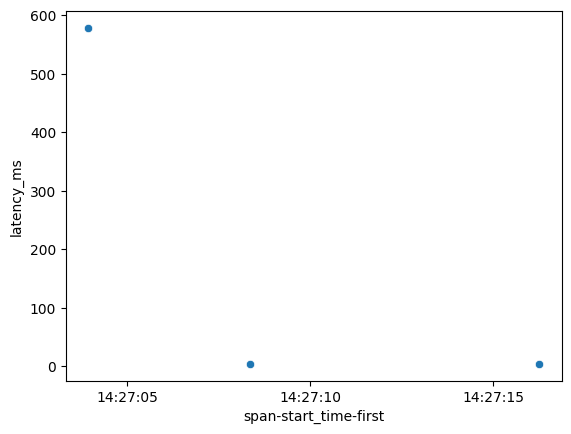

In [255]:
#now plot 'span-start_time-first' by latency
sns.scatterplot(data=df_span_delta_limit, x='span-start_time-first', y='latency_ms')